# 의사결정나무(Decision Tree )

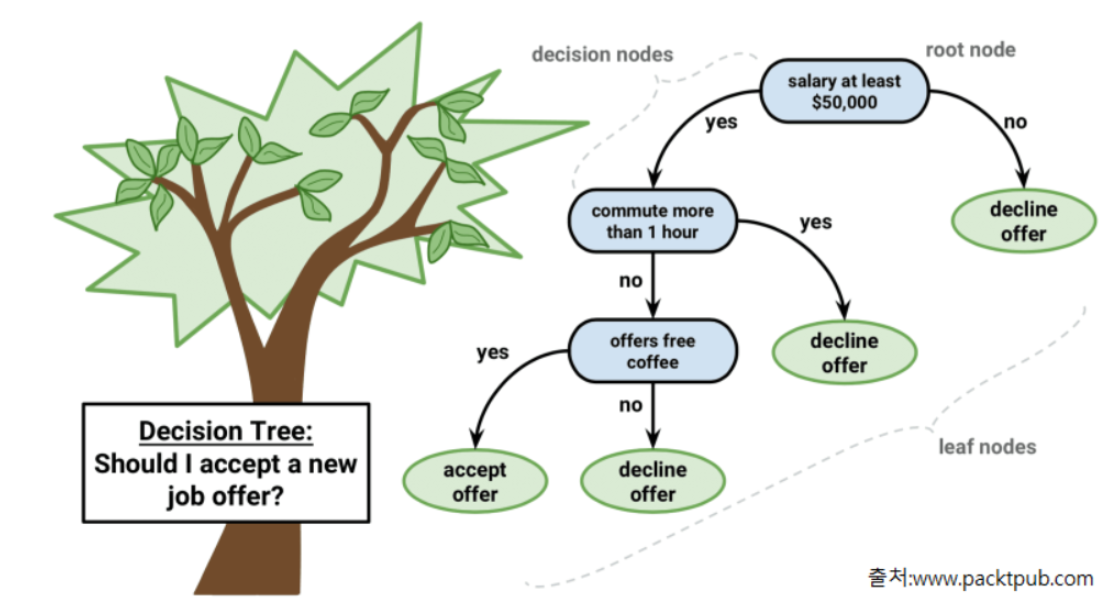

## 개요

- 데이터를 잘 분류할 수 있는 질문을 던져 가며 대상을 좁혀가는 '스무고개'와 비슷한 형식의 알고리즘.
- 추론결과을 위해 분기해 나가는 구조가 Tree 구조와 같기 때문에 Decision Tree 라고 한다.
    - 노드안의 원소들의 불순도 최대한 감소하는 방향(최대한 한 class의 값들만 있는 상태)으로 조건을 만들어 학습을 진행한다.
    - 하위노드는 yes/no 두 개로 분기 된다.
    - **분기 기준**
        - **분류:** 가장 불순도를 낮출수 있는 조건을 찾아 분기한다.
        - **회귀:** 가장 오차가 적은 조건을 찾아 분기 한다. 
- 머신러닝 모델들 중 몇 안되는 White box 모델로 추론 결과에 대한 해석이 가능하다.
- 과대적합(Overfitting)이 발생하기 쉽다.
- 앙상블기반 알고리즘인 랜덤 포레스트와 많은 부스팅(Boosting)기반 앙상블 모델들의 기반 알고리즘으로 사용된다.

> **순도(purity)/불순도(impurity)**
>    - 서로 다른 종류의 값들이 섞여 있는 비율
>    - 한 종류(class)의 값이 많을 수록 순도가 높고 불순도는 낮다.

## 용어
- Root Node : 시작 node
- Decision Node (Intermediate Node): 중간 node
- Leaf Node(Terminal Node) : 마지막 단계(트리의 끝)에 있는 노드로 최종결과를 가진다.

## 과대적합(Overfitting) 문제
- 모든 데이터셋이 모두 잘 분류 되어 불순도가 0이 될때 까지 분기해 나간다.
- Root에서 부터 하위 노드가 많이 만들어 질 수록 모델이 복잡해져 과대적합이 발생할 수 있다.
- 과대적합을 막기 위해서는 적당한 시점에 하위노드가 더이상 생성되지 않도록 해야 한다.
    - 하위 노드가 더이상 생성되지 않도록 하는 것을 **가지치기(Pruning)** 라고 한다.
    

## 하이퍼파라미터

- **max_depth** 
    - 트리의 최대 깊이(질문 단계)를 정의
    - 기본값: None - 깊이 제한 없이 완벽히 분할 될때 까지 분기한다.
        - 분류: 불순도가 0이 될때 까지, 회귀: MSE가 0이 될 때 까지
- **max_leaf_nodes**
    - Leaf Node 개수 제한한다. 
    - 기본값: None - 제한없다.
    - ex) max_leaf_nodes=10 -> 전체 Tree의 leaf node가 최대 10개를 넘을 수 없다.
- **min_samples_leaf**
    - Leaf Node가 가져야 하는 최소한의 sample (데이터) 수를 지정한다.
    - 개수를 지정할 수 도있고(정수), 전체 샘플대비 비율로 지정(0.0 ~ 0.5 실수)할 수 있다.
        - ex: min_sample_leaf=5 -> 모든 leaf node는 최소한 5개 데이터를 가져야한다. 그래서 5개가 되면 더이상 분기하지 않는다.
    - 기본값: 1 -> 제한이 없다. 
- **max_features**
    - 분기 할 때마다 지정한 개수의 Feature(특성)만 사용한다.
    - 다음 값 중 선택한다.
        - None(기본값): 전체 Feature를 다 사용한다.
        - 정수: 개수를 지정한다.
        - 0 ~ 1 사이 실수: 전체 개수 대비 비율
        - "sqrt": 전체 특성개수의 제곱근 개수만큼만 사용한다.
        - "log2": $\log _{2} {Feature개수}$ 만큼만 사용한다.
        - Feature 가 25개일 경우 
            - 'sqrt' 는 $\sqrt{25}=5$ 이므로 5개 Feature를 사용
            - 'log2' 는 $\log_{2} 25=4.64$ 이므로 5개 특성 사용
- **min_samples_split**
    - 분할 하기 위해서 필요한 최소 샘플 수를 정의. 정의한 개수보다 더 적은 샘플을 가진 노드는 더이상 분기 되지 않는다.
    - 기본값: 2
    - ex) min_samples_split=10 -> sample 수가 10 미만인 노드는 더이상 분기되지 않는다.
- **criterion**
    - 각 노드의 불순도 계산 방식을 정의한다.
    - 분류
        - "gini"(기본값), "entropy"
    - 회귀
        - "squared_error"(기본값), "absolute_error", "friedman_mse", "poisson"

## Feature(컬럼) 중요도 조회
- **feature_importances_** 속성
    - 모델을 학습 결과를 기반으로 각 Feature 별 중요도를 반환
    - 전처리 단계에서 input data 에서 중요한 feature들을 선택할 때 decision tree를 이용한다.

## Wine Dataset을 이용한 color 분류

- https://archive.ics.uci.edu/ml/datasets/Wine+Quality
- features
    - 와인 화학성분들
        - fixed acidity : 고정 산도
        - volatile acidity : 휘발성 산도
        - citric acid : 시트르산
        - residual sugar : 잔류 당분
        - chlorides : 염화물
        - free sulfur dioxide : 자유 이산화황
        - total sulfur dioxide : 총 이산화황
        - density : 밀도
        - pH : 수소 이온 농도
        - sulphates : 황산염
        - alcohol : 알콜
    - quality: 와인 등급 (A>B>C)
- target - color
    - 0: white, 1: red

##### 데이터셋 분리 및 전처리

##### 전처리
- 범주형 타입인 **quality**에 대해 Label Encoding 처리

>- DecisionTree 계열 모델
>    - 범주형: Label Encoding, 연속형: Feature Scaling을 하지 않는다.
>- 선형계열 모델(예측시 모든 Feature들을 한 연산에 넣어 예측하는 모델)
>    - 범주형: One Hot Encoding, 연속형: Feature Scaling을 한다.

# Ensemble(앙상블)
- 하나의 모델만을 학습시켜 사용하지 않고 여러 모델을 학습시켜 결합하는 방식으로 문제를 해결하는 방식
- 개별로 학습한 여러 모델을 조합해 과적합을 막고 일반화 성능을 향상시킬 수 있다.
- 개별 모델의 성능이 확보되지 않을 때 성능향상에 도움될 수 있다.

## 앙상블의 종류

### 1. 투표방식
- 여러개의 추정기(Estimator)가 낸 결과들을 투표를 통해 최종 결과를 내는 방식
- 종류
    1. Bagging - 같은 유형의 알고리즘들을 조합하되 각각 학습하는 데이터를 다르게 한다. 
        - Random Forest가 Bagging을 기반으로 한다.
    2. Voting - 서로 다른 종류의 알고리즘들을 결합한다.
    

### 2. 부스팅(Boosting)    
- 약한 학습기(Weak Learner)들을 결합해서 보다 정확하고 강력한 학습기(Strong Learner)를 만든다.
- 각 약한 학습기들은 순서대로 일을 하며 뒤의 학습기들은 앞의 학습기가 찾지 못한 부분을 추가적으로 찾는다.

# Random Forest (랜덤포레스트)
- Bagging 방식의 앙상블 모델
- Decision Tree를 기반으로 한다. 
- 다수의 Decision Tree를 사용해서 성능을 올린 앙상블 알고리즘의 하나
    - N개의 Decision Tree 생성하고 입력데이터를 각각 추론하게 한 뒤 가장 많이 나온 추론결과를 최종결과로 결정한다.
- 처리속도가 빠르며 성능도 높은 모델로 알려져 있다.  

> - Random: 학습할 때 Train dataset을 random하게 sampling한다.
> - Forest: 여러개의 (Decision) Tree 모델들을 앙상블한다.

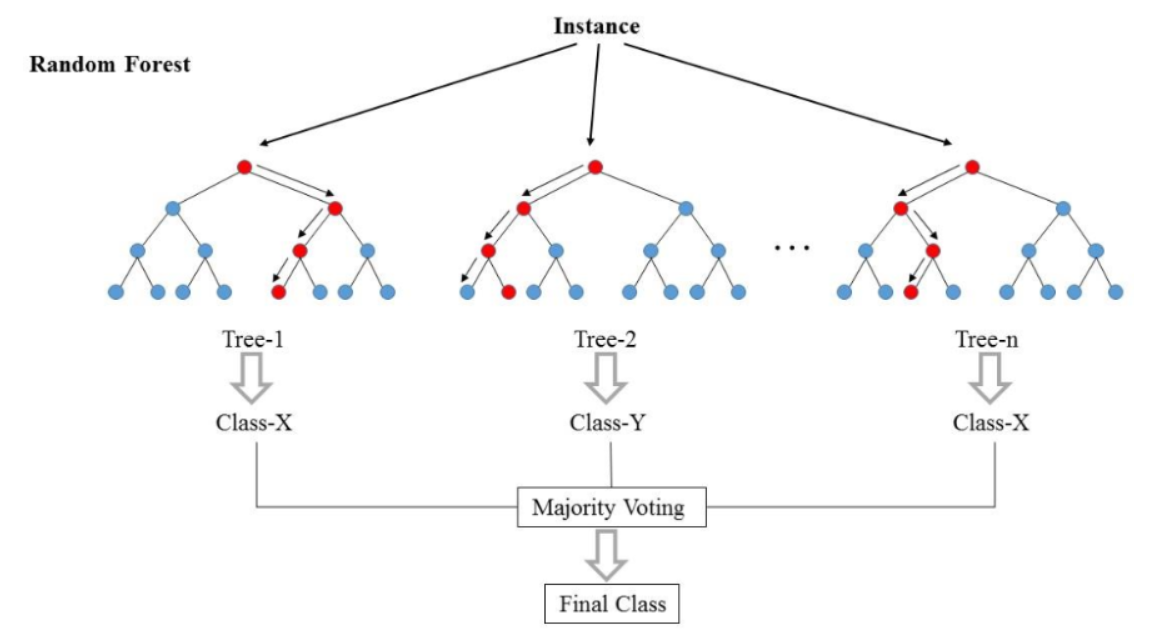

- **랜덤포레스트의 절차**
    - 객체 생성시 Decision Tree의 개수, Decision Tree에 대한 하이퍼파라미터들 등을 받아서 생성한다.
        - 모든 DecisionTree들은 같은 구조를 가지게 한다.
    - 학습시 모든 Decision Tree들이 서로 다른 데이터셋으로 학습하도록 Train dataset으로 부터 생성한 DecisionTree개수 만큼  sampling 한다.
        - **부트스트랩 샘플링**(중복을 허용하면서 랜덤하게 샘플링하는 방식)으로 데이터셋을 준비한다. (총데이터의 수는 원래 데이터셋과 동일 하지만 일부는 누락되고 일부는 중복된다.)
        - Sampling된 데이터셋들은  **전체 피처중 일부만** 랜덤하게 가지게 한다.
    - 각 트리별로 예측결과를 내고 분류의 경우 그 예측을 모아 다수결 투표로 클래스 결과를 낸다. 
    - 회귀의 경우는 예측 결과의 평균을 낸다.

- **주요 하이퍼파라미터**
    - n_estimators
        - DecisionTree 모델의 개수
        - 학습할 시간과 메모리가 허용하는 범위에서 클수록 좋다. 
    - max_features
        - 각 트리에서 선택할 feature의 개수
        - 클수록 각 트리간의 feature 차이가 크고 작을 수록 차이가 적게 나게 된다.
    - DecisionTree의 하이퍼파라미터들
        - Tree의 최대 깊이, 가지를 치기 위한 최소 샘플 수 등 Decision Tree에서 과적합을 막기 위한 파라미터들을 랜덤 포레스트에 적용할 수 있다.

### 와인 데이터셋 color 분류

##### train/test set 분리

##### RandomForestClassifier 생성, 학습, 검증

##### Feature importance